<a href="https://colab.research.google.com/github/ttezy/Time-Sequence-Analysis/blob/main/VAR_Multivariate_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Load data**
## **You may need to upload pollution.csv to /content/pollution.csv**

## **Import libs**

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.api import VAR

from sklearn.metrics import mean_squared_error
from math import sqrt

import time

mpl.rcParams['figure.figsize'] = (15, 8)  # modify here to change the size of figures
mpl.rcParams['axes.grid'] = False

## **Load dataset**

In [ ]:
df=pd.read_csv('pollution.csv',header=0, index_col=0)
df

pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-01 00:00:00        0.0  -21 -11.0  1021.0      NW     1.79     0     0
2010-01-01 01:00:00        0.0  -21 -12.0  1020.0      NW     4.92     0     0
2010-01-01 02:00:00        0.0  -21 -11.0  1019.0      NW     6.71     0     0
2010-01-01 03:00:00        0.0  -21 -14.0  1019.0      NW     9.84     0     0
2010-01-01 04:00:00        0.0  -20 -12.0  1018.0      NW    12.97     0     0
...                        ...  ...   ...     ...     ...      ...   ...   ...
2014-12-31 19:00:00        8.0  -23  -2.0  1034.0      NW   231.97     0     0
2014-12-31 20:00:00       10.0  -22  -3.0  1034.0      NW   237.78     0     0
2014-12-31 21:00:00       10.0  -22  -3.0  1034.0      NW   242.70     0     0
2014-12-31 22:00:00        8.0  -22  -4.0  1034.0      NW   246.72     0     0
2014-12-31 23:00:00       12.0  -21  -3.0  1034.0      NW   249.85     0     0

[43824 rows x 8 columns]

## **Visualize data**

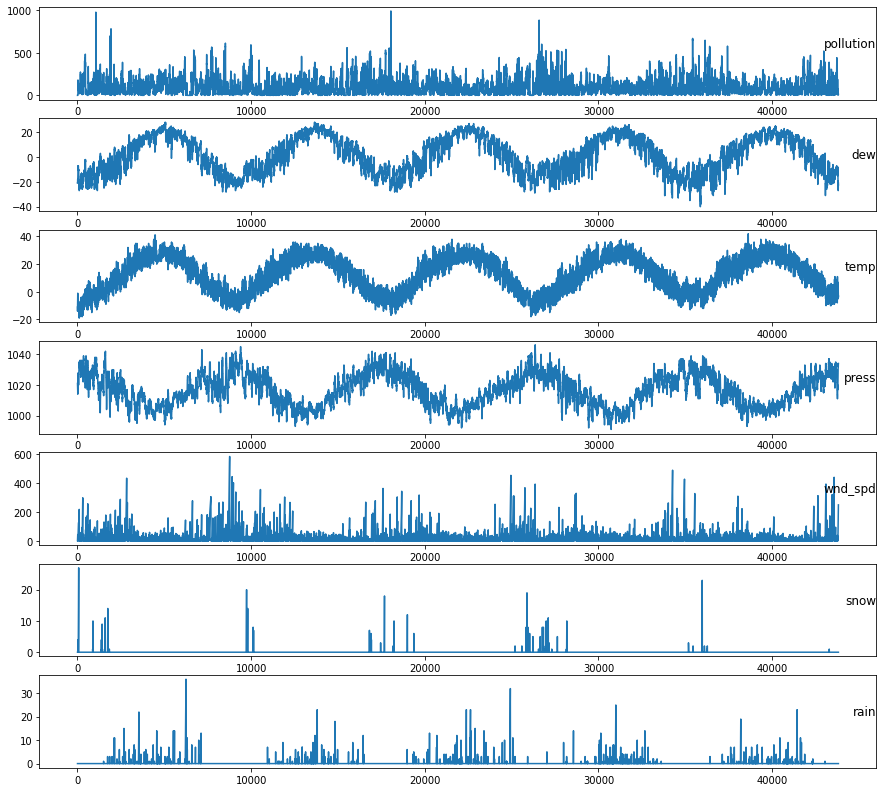

In [ ]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure(figsize = (15, 14))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

# **Step 2: Data Property Analysis**

## **Encode wind direction**

In [ ]:
# integer encode direction
encoder = LabelEncoder()
values[:, 4] = encoder.fit_transform(values[:, 4])
# ensure all data is float
values = values.astype('float32')

df['wnd_dir'] = values[:, 4]

df.head()

pollution  dew  temp   press  wnd_dir  wnd_spd  snow  rain
date                                                                           
2010-01-01 00:00:00        0.0  -21 -11.0  1021.0      1.0     1.79     0     0
2010-01-01 01:00:00        0.0  -21 -12.0  1020.0      1.0     4.92     0     0
2010-01-01 02:00:00        0.0  -21 -11.0  1019.0      1.0     6.71     0     0
2010-01-01 03:00:00        0.0  -21 -14.0  1019.0      1.0     9.84     0     0
2010-01-01 04:00:00        0.0  -20 -12.0  1018.0      1.0    12.97     0     0

## **Check stationary or not**

In [ ]:
# for i in range(len(df.columns)):
#   result = adfuller(df[df.columns[i]])

#   if result[1] > 0.05 :
#     print('{} - Series is not Stationary'.format(df.columns[i]))
#   else:
#     print('{} - Series is Stationary'.format(df.columns[i]))

## **Choose lag = 8 and show P_values**

In [ ]:
# max_lags=8  # modify here to choose the lag
# y='pollution'

In [ ]:
# for i in range(len(df.columns)-1):
#   results=grangercausalitytests(df[[y,df.columns[i+1]]], max_lags, verbose=False)
#   p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
#   print('Column - {} : P_Values - {}'.format(df.columns[i+1],p_values))

## **Choose the input data**

In [ ]:
df_input=df[['pollution','dew','temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']]  # modify here to choose the variate
df_input

pollution  dew  temp   press  wnd_dir  wnd_spd  snow  rain
date                                                                           
2010-01-01 00:00:00        0.0  -21 -11.0  1021.0      1.0     1.79     0     0
2010-01-01 01:00:00        0.0  -21 -12.0  1020.0      1.0     4.92     0     0
2010-01-01 02:00:00        0.0  -21 -11.0  1019.0      1.0     6.71     0     0
2010-01-01 03:00:00        0.0  -21 -14.0  1019.0      1.0     9.84     0     0
2010-01-01 04:00:00        0.0  -20 -12.0  1018.0      1.0    12.97     0     0
...                        ...  ...   ...     ...      ...      ...   ...   ...
2014-12-31 19:00:00        8.0  -23  -2.0  1034.0      1.0   231.97     0     0
2014-12-31 20:00:00       10.0  -22  -3.0  1034.0      1.0   237.78     0     0
2014-12-31 21:00:00       10.0  -22  -3.0  1034.0      1.0   242.70     0     0
2014-12-31 22:00:00        8.0  -22  -4.0  1034.0      1.0   246.72     0     0
2014-12-31 23:00:00       12.0  -21  -3.0  1034.0      1.0   249.85     0     0

[43824 rows x 8 columns]

# **Step 3: Prepare for model**

## **Split training and testing data**

In [ ]:
df_train = df_input[:int(0.9*(len(df_input)))]
print('train shape: ', str(df_train.shape))
df_test = df_input[int(0.9*(len(df_input))):]
print('test shape: ', str(df_test.shape))

train shape:  (39441, 8)
test shape:  (4383, 8)


# **Step 4: Train VAR Model**

## **Choose lag = 25 and fit model again**

In [ ]:
model = VAR(df_train, freq="1H")

train_time = np.zeros(24)
start_time = time.perf_counter()
results = model.fit(25)
stop_time = time.perf_counter()

train_time.fill(stop_time-start_time)

# **Step 5: Test forecasting ability for more future time**

## **Test future 24 hours(step = 24) and the RMSE**

In [ ]:
prediction = np.array([])
maxStep = 24
RMSE = list()

pred_time = np.array([])

for futureStep in range(1, maxStep+1):
  pred = np.zeros(25)

  start_time = time.perf_counter()
  results.forecast(df_test.values[0:25],steps=futureStep)
  stop_time = time.perf_counter()
  pred_time = np.append(pred_time, stop_time-start_time)


  for i in range(25, int(len(df_test['pollution'])), futureStep):
    pred_next = results.forecast(df_test.values[i-25:i],steps=futureStep)[:, 0]
    pred = np.append(pred, pred_next)

  pred = pred[:int(len(df_test['pollution']))]

  rmse = sqrt(mean_squared_error(df_test['pollution'][25:], pred[25:]))
  RMSE.append(rmse)

  print("Future Step = ", '{:2s}'.format(str(futureStep)), "  test shape: ", str(df_test.shape), "  prediction shape: ", str(pred.shape), " RMSE(Root Mean Square Error): ", str(rmse))
  
  if futureStep == 1:
    prediction = [pred]
  else:
    prediction = np.append(prediction, [pred],axis = 0)

Future Step =  1    test shape:  (4383, 8)   prediction shape:  (4383,)  RMSE(Root Mean Square Error):  21.5792881955787
Future Step =  2    test shape:  (4383, 8)   prediction shape:  (4383,)  RMSE(Root Mean Square Error):  26.45446265228576
Future Step =  3    test shape:  (4383, 8)   prediction shape:  (4383,)  RMSE(Root Mean Square Error):  30.682874290347485
Future Step =  4    test shape:  (4383, 8)   prediction shape:  (4383,)  RMSE(Root Mean Square Error):  34.57065949171745
Future Step =  5    test shape:  (4383, 8)   prediction shape:  (4383,)  RMSE(Root Mean Square Error):  38.02738230437412
Future Step =  6    test shape:  (4383, 8)   prediction shape:  (4383,)  RMSE(Root Mean Square Error):  40.7918427129517
Future Step =  7    test shape:  (4383, 8)   prediction shape:  (4383,)  RMSE(Root Mean Square Error):  43.828482610076996
Future Step =  8    test shape:  (4383, 8)   prediction shape:  (4383,)  RMSE(Root Mean Square Error):  49.30554270496678
Future Step =  9    test

In [ ]:
print(np.shape(prediction))

(24, 4383)


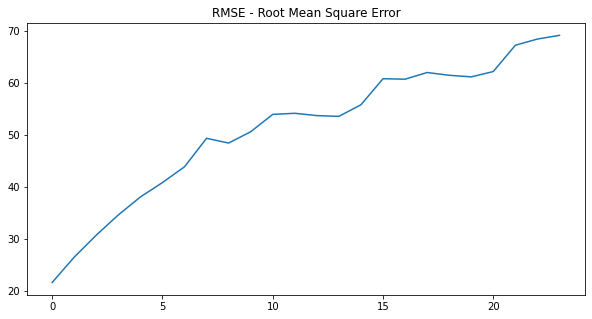

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(RMSE)
plt.title("RMSE - Root Mean Square Error")
plt.show()

## **Visualize the future 24-hours forecast**

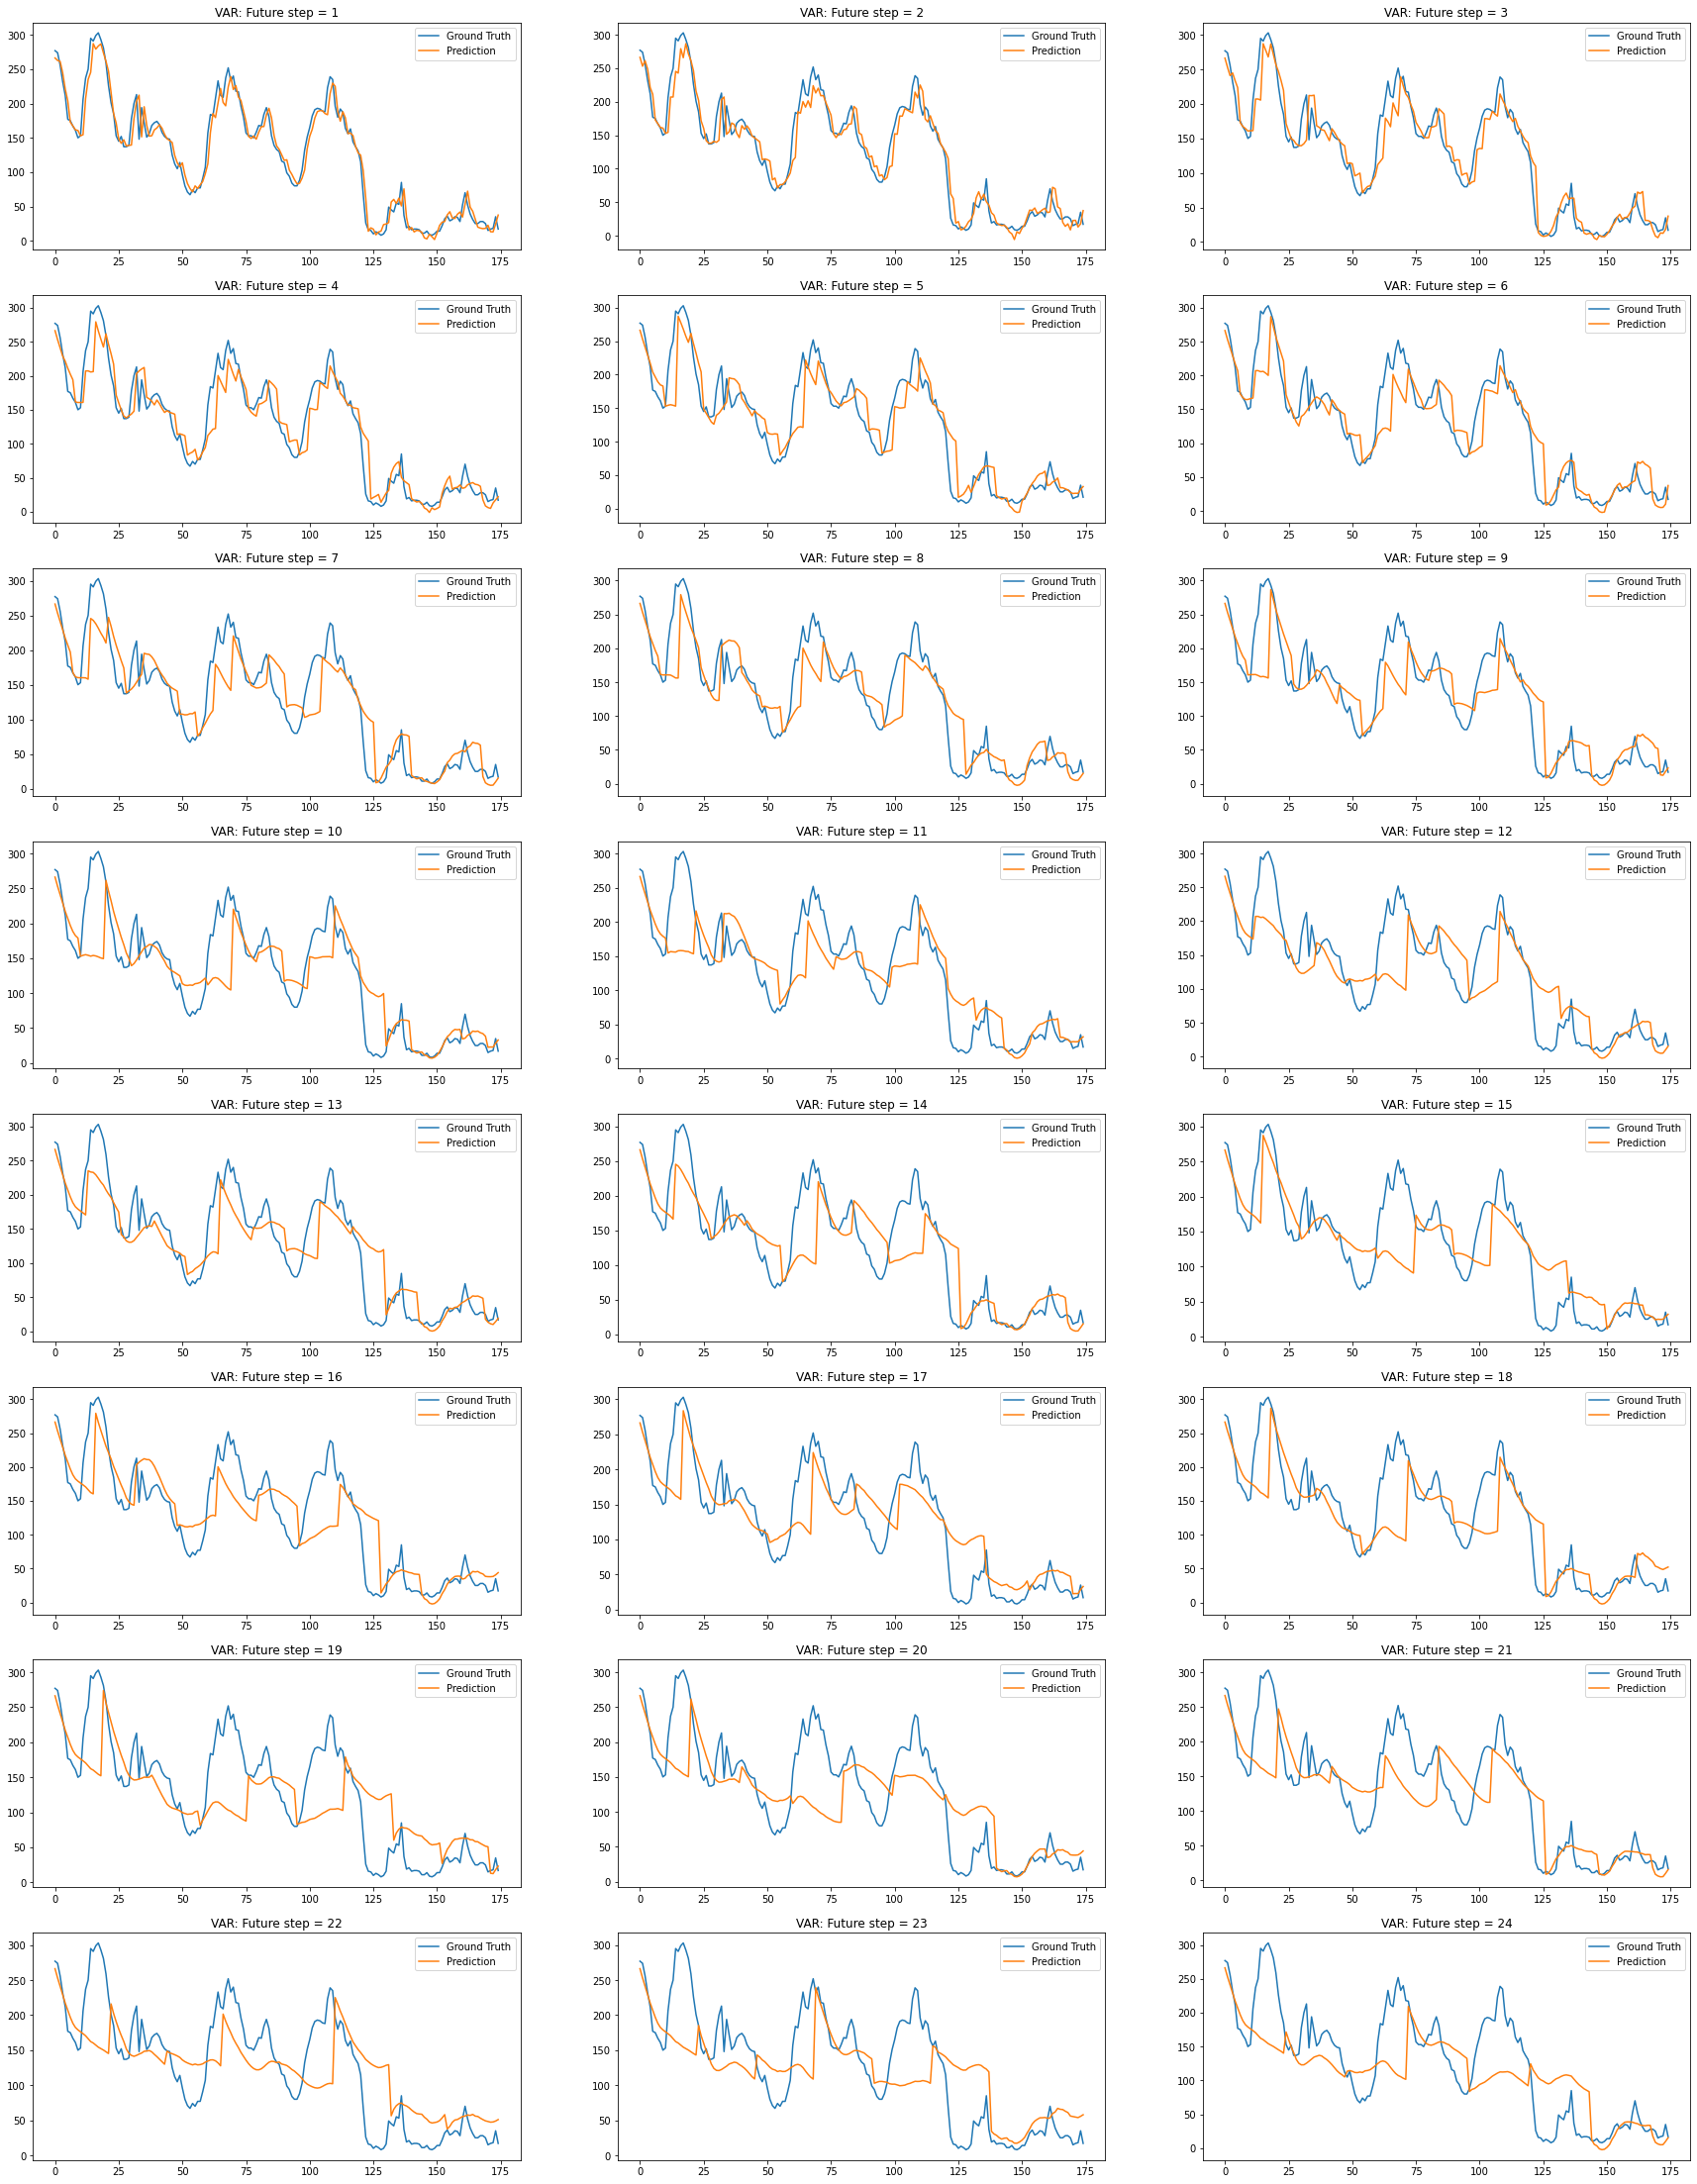

In [ ]:
plt.figure(figsize=(30,60))
for i in range(maxStep):
  plt.subplot(12, 3, i+1)
  plt.plot(df_test['pollution'].values[25:200], label='Ground Truth')
  plt.plot(prediction[i][25:200], label='Prediction')
  plt.title("VAR: Future step = " + str(i+1))
  plt.legend()
plt.show()

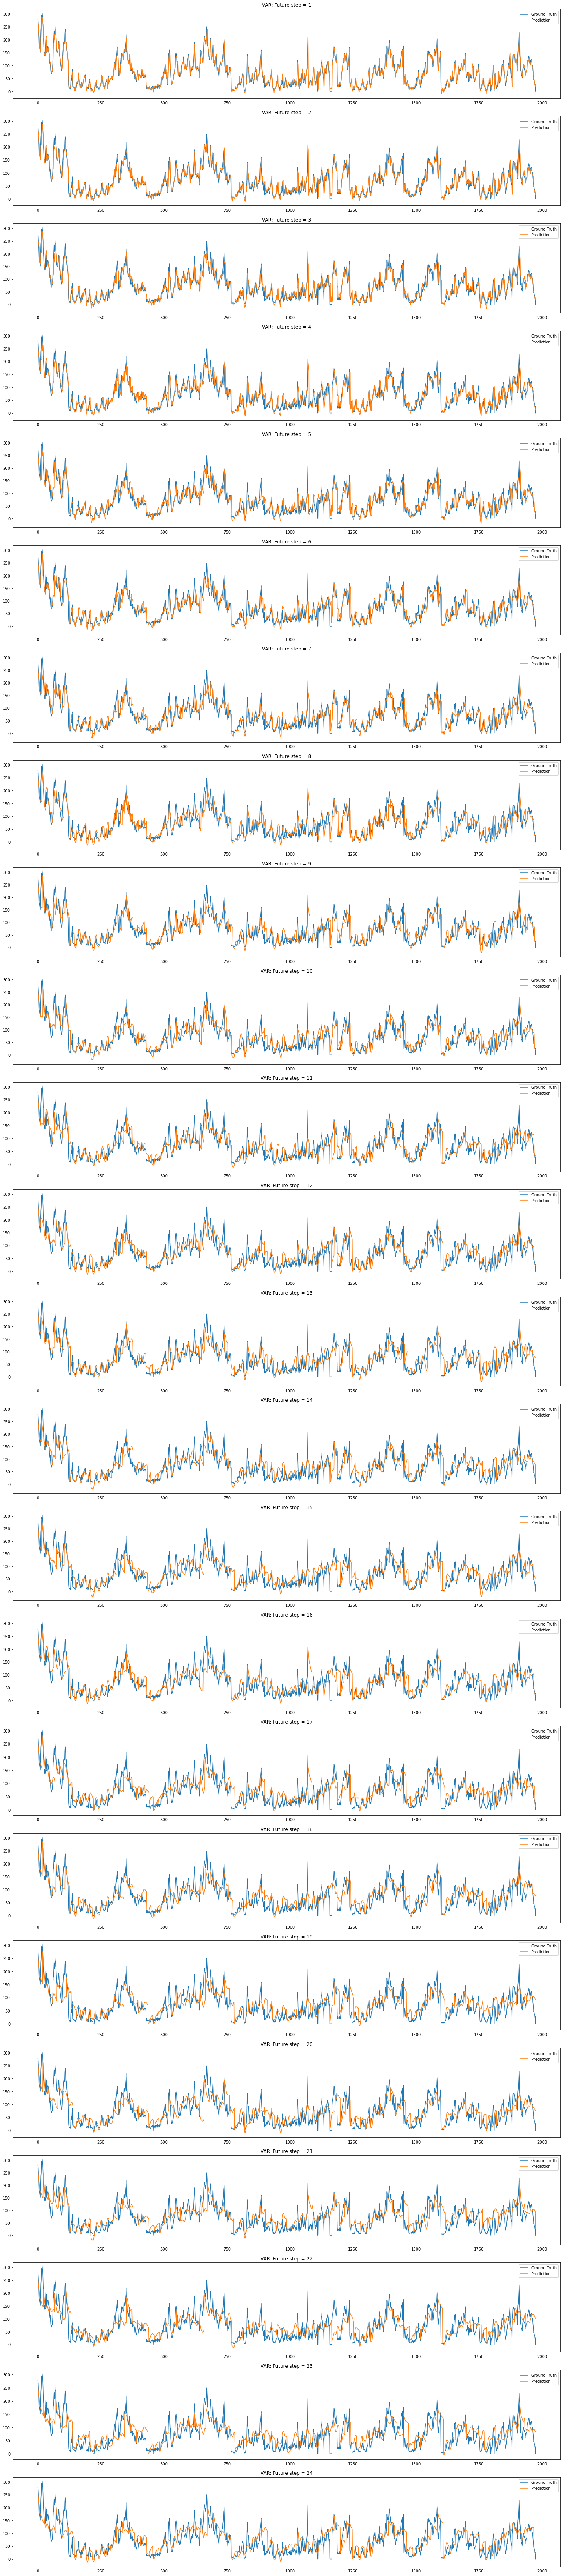

In [ ]:
plt.figure(figsize=(25, 24*5))
for i in range(maxStep):
  plt.subplot(24, 1, i+1)
  plt.plot(df_test['pollution'].values[25:2000], label='Ground Truth')
  plt.plot(prediction[i][25:2000], label='Prediction')
  plt.title("VAR: Future step = " + str(i+1))
  plt.legend()
plt.show()

In [ ]:
performance = pd.read_csv('/content/performance.csv')
performance['VAR_train_time'] = train_time
performance['VAR_pred_time'] = pred_time
performance['VAR_RMSE'] = RMSE
performance.to_csv('/content/performance.csv')
performance

futureStep  LSTM_train_time  ...  VAR_pred_time   VAR_RMSE
0            1       105.876651  ...       0.000739  21.579288
1            2        87.481275  ...       0.004411  26.454463
2            3        90.200571  ...       0.000437  30.682874
3            4        87.507864  ...       0.000547  34.570659
4            5       144.578841  ...       0.000600  38.027382
5            6       144.036165  ...       0.003270  40.791843
6            7        87.991832  ...       0.000748  43.828483
7            8        87.094941  ...       0.002128  49.305543
8            9       144.055997  ...       0.002578  48.388991
9           10        95.500659  ...       0.002761  50.566161
10          11        92.116462  ...       0.001063  53.907726
11          12        90.099285  ...       0.001079  54.114896
12          13       144.083948  ...       0.001175  53.670065
13          14        91.178018  ...       0.001849  53.527903
14          15        86.357032  ...       0.002567  55.759670
15          16       144.676540  ...       0.001414  60.764339
16          17        92.246476  ...       0.003772  60.675500
17          18        90.665288  ...       0.001588  61.960334
18          19       144.010656  ...       0.001790  61.426568
19          20       144.667461  ...       0.001667  61.122455
20          21        97.294475  ...       0.002317  62.148053
21          22        97.603906  ...       0.001924  67.204073
22          23        96.059200  ...       0.001828  68.395250
23          24       144.200306  ...       0.004458  69.106740

[24 rows x 7 columns]